In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요

In [3]:
df_X = diabetes.data
df_y = diabetes.target

- diabetes의 data를 df_X에, target을 df_y에 저장해주세요

In [5]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y)

- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요

In [7]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
print("완료")

완료


- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요

In [8]:
W

array([0.41421296, 0.43277744, 0.51976886, 0.75395389, 0.60613759,
       0.17911286, 0.69122357, 0.09792058, 0.65457054, 0.0815213 ])

In [9]:
b

0.482339489266459

In [10]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("완료")

완료


- 모델 함수를 구현해주세요

In [11]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse
print("완료")

완료


- 손실함수를 MSE 함수로 정의해주세요

In [12]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("완료")

완료


In [13]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("완료")

완료


In [14]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.37094045 -0.31244599 -4.29046909 -3.227003   -1.54569863 -1.26910813
  2.89120536 -3.14829316 -4.13839904 -2.79649116]
db: -303.302289347259


In [32]:
LEARNING_RATE = 0.1

- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요

- 0.0001일 때는 loss가 13777.15이 나온다
- 0.001일 때는 loss가 5230.58이 나온다
- 0.01일 때는 loss가 4644.99가 나온다
- 0.1일 때는 loss가 3049.28이 나온다  


- 0.1, iteration이 2000일때 2868.88이 나온다
- 0.1, iteration이 3000일때 2871.02이 나온다
- 0.1, iteration이 4000일때 2880.38이 나온다

In [49]:
losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2897.9487
Iteration 20 : Loss 2897.9429
Iteration 30 : Loss 2897.9371
Iteration 40 : Loss 2897.9313
Iteration 50 : Loss 2897.9255
Iteration 60 : Loss 2897.9198
Iteration 70 : Loss 2897.9141
Iteration 80 : Loss 2897.9084
Iteration 90 : Loss 2897.9027
Iteration 100 : Loss 2897.8970
Iteration 110 : Loss 2897.8914
Iteration 120 : Loss 2897.8858
Iteration 130 : Loss 2897.8802
Iteration 140 : Loss 2897.8746
Iteration 150 : Loss 2897.8690
Iteration 160 : Loss 2897.8635
Iteration 170 : Loss 2897.8579
Iteration 180 : Loss 2897.8524
Iteration 190 : Loss 2897.8469
Iteration 200 : Loss 2897.8415
Iteration 210 : Loss 2897.8360
Iteration 220 : Loss 2897.8306
Iteration 230 : Loss 2897.8252
Iteration 240 : Loss 2897.8198
Iteration 250 : Loss 2897.8144
Iteration 260 : Loss 2897.8090
Iteration 270 : Loss 2897.8037
Iteration 280 : Loss 2897.7984
Iteration 290 : Loss 2897.7930
Iteration 300 : Loss 2897.7878
Iteration 310 : Loss 2897.7825
Iteration 320 : Loss 2897.7772
Iteration 330 : L

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요

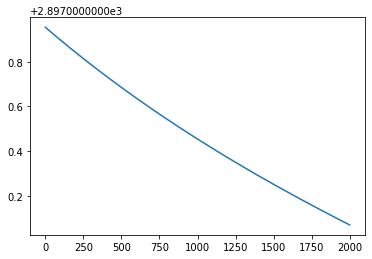

In [50]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [51]:
W, b

(array([  40.65555485, -239.07750451,  554.11343143,  341.5415508 ,
        -105.41925195, -123.48173227, -212.90668952,  151.05642512,
         417.21832785,   64.59580592]),
 151.30231014596035)

In [52]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2882.435944183819

- test 데이터에 대한 성능을 확인해주세요

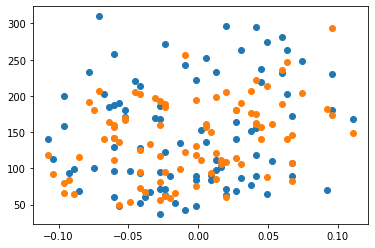

In [53]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요